**Some explorations of the car racing gymansium environment**<br>
https://www.gymlibrary.dev/environments/box2d/car_racing/

In [1]:
import matplotlib.pyplot as plt
import math

import gymnasium as gym
env = gym.make("CarRacing-v2", render_mode=None, continuous=False)
observation, info = env.reset()

In [2]:
# action space
print(env.action_space)

Discrete(5)


The possible actions are: 0, 1, 2, 3, 4<br>
The [documentation](https://gymnasium.farama.org/environments/box2d/car_racing/#action-space) gives more details:
- 0: do nothing
- 1: steer left
- 2: steer right
- 3: gas
- 4: brake

It is possible to make action space continuous, which results in three actions:
- 0: steering, -1 is full left, +1 is full right
- 1: gas
- 2: breaking

In [3]:
# observation space
print(env.observation_space)
print(observation.shape)

Box(0, 255, (96, 96, 3), uint8)
(96, 96, 3)


The observation space is "a top-down 96x96 RGB image of the car and race track" ([see documentation](https://gymnasium.farama.org/environments/box2d/car_racing/#observation-space)) with 3 channels for color.

Example image for the first frame:

In [4]:
def view_observations(obs_list, fig_size=5):
    """
    Display one or multiple observations in a square grid.

    Parameters:
    obs_list (list or ndarray): A single observation or a list of observations.
                                Each observation should be an image array.
    fig_size (int): The size of the figure (both width and height).

    If a single observation is provided, it is displayed directly.
    If multiple observations are provided, they are displayed in a square grid layout.
    """
    # Check if obs_list is a single observation or a list
    if isinstance(obs_list, list):
        num_obs = len(obs_list)
    else:
        num_obs = 1
        obs_list = [obs_list]
    
    # Display a single observation
    if num_obs == 1:
        plt.figure(figsize=(fig_size, fig_size))
        plt.imshow(obs_list[0])
        plt.axis('off')
        plt.show()
    else:
        # Calculate the grid size
        rows = math.floor(math.sqrt(num_obs))
        cols = math.ceil(num_obs / rows)
        fig, axes = plt.subplots(rows, cols, figsize=(fig_size*cols, fig_size*rows))
        
        # Flatten axes array for easier iteration
        axes = axes.flatten()
        
        # Display each observation
        for idx, obs in enumerate(obs_list):
            axes[idx].imshow(obs)
            axes[idx].axis('off')
        
        # Hide unused subplots
        for i in range(len(obs_list), rows * cols):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()

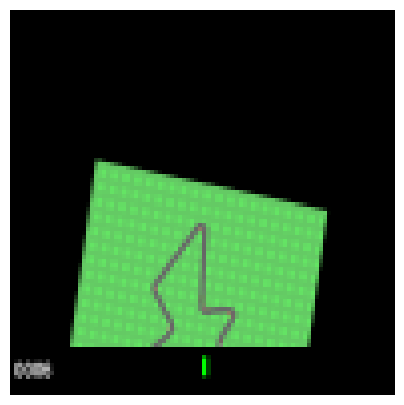

In [5]:
view_observations(observation)

The track is generated in a random manner, as seen in the following examples:

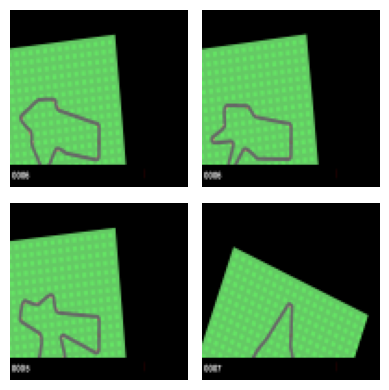

In [6]:
frames = []
for i in range(4):
    env.reset()
    observation, reward, terminated, truncated, info = env.step(0) 
    frames.append(observation)

view_observations(frames, fig_size=2)

Each run starts with a sequence of frames that zoom in on the car. The length is approximately 40 to 50 steps:

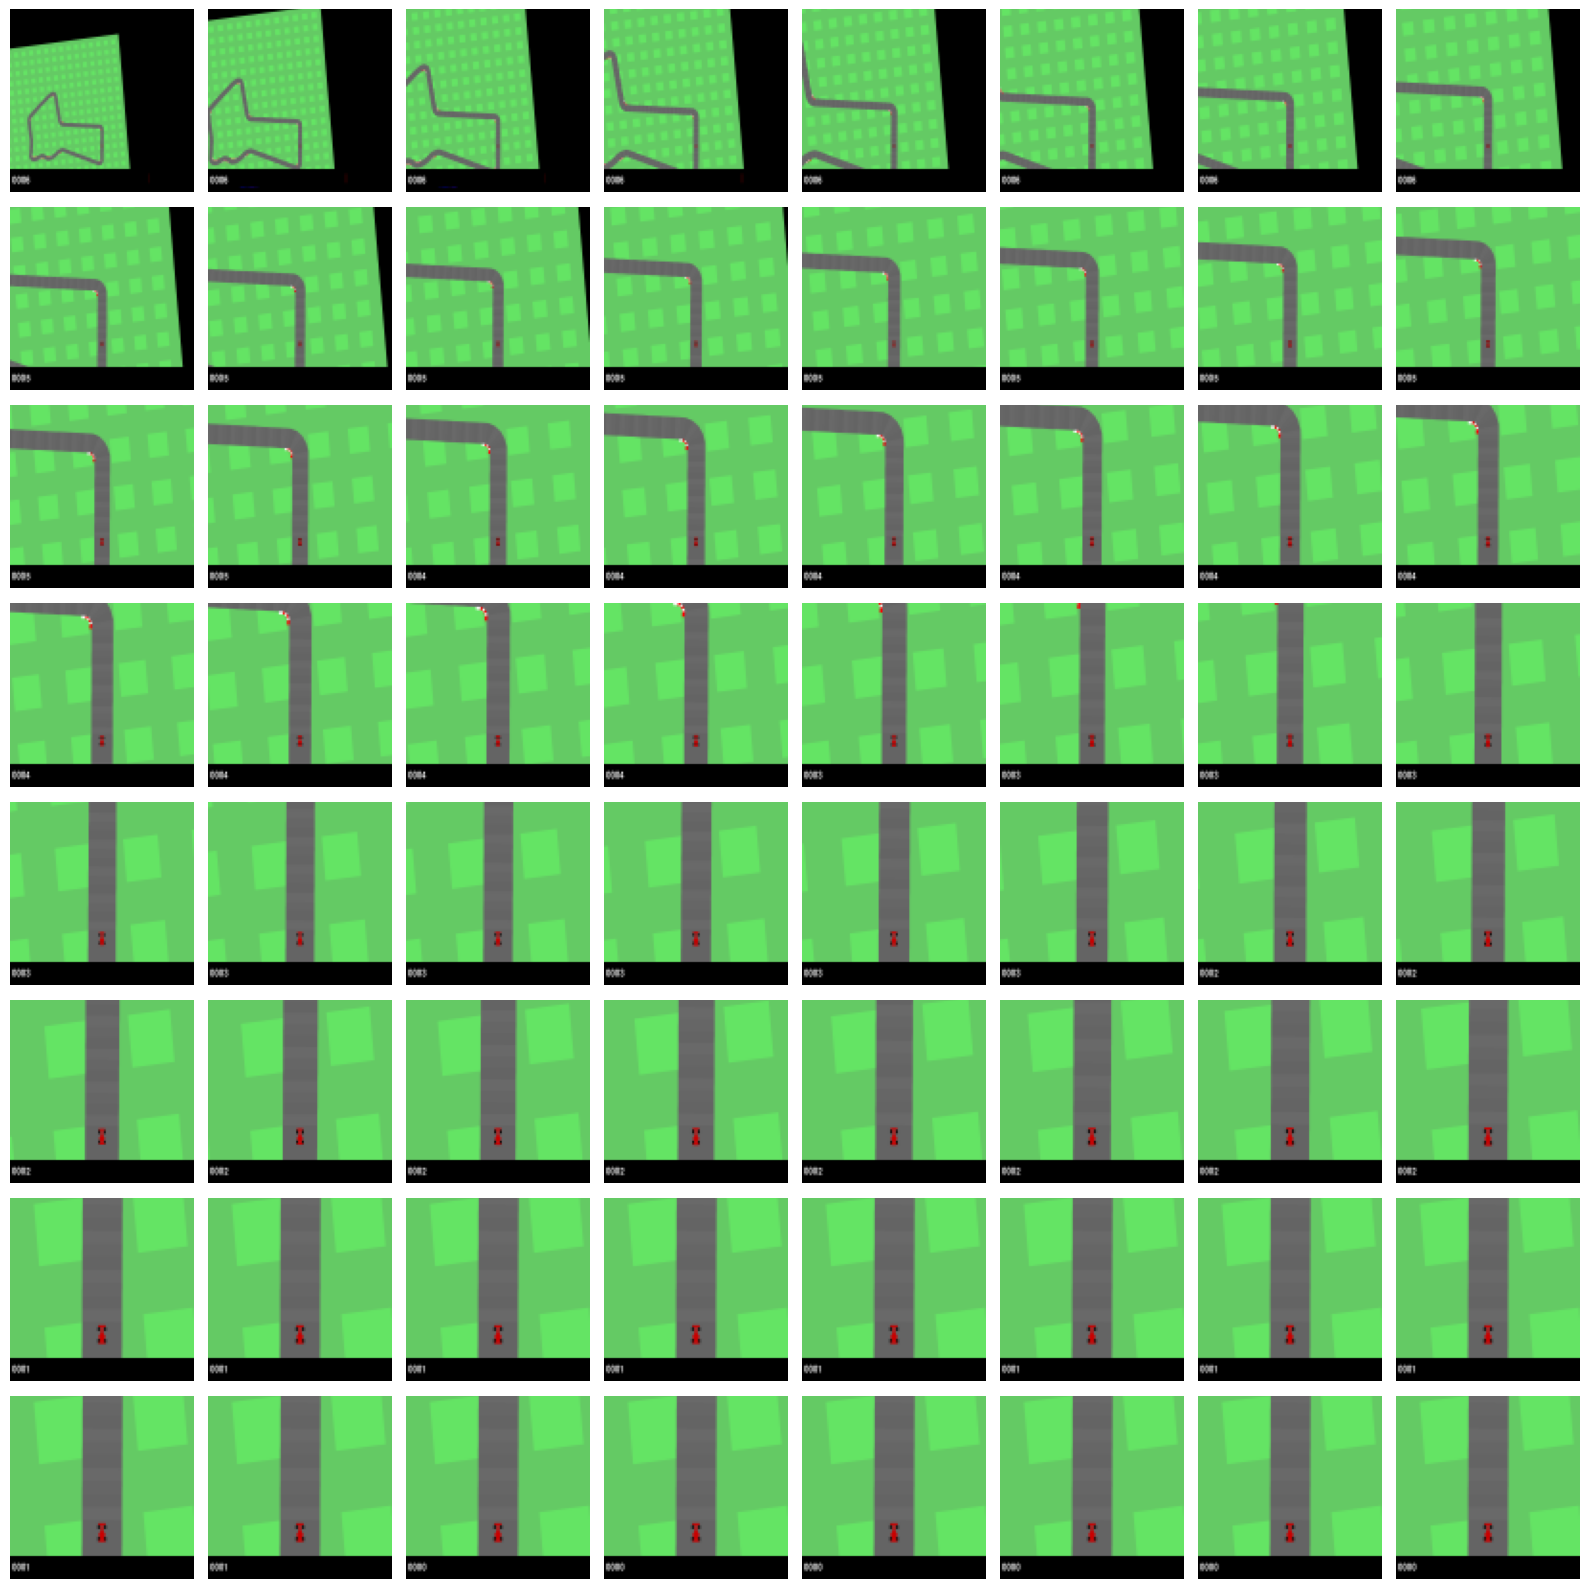

In [7]:
env.reset()
frames = []
for i in range(100):
    observation, reward, terminated, truncated, info = env.step(0) 
    frames.append(observation)

view_observations(frames[0:8**2], fig_size=2)

Example of the car just moving in a straight line:

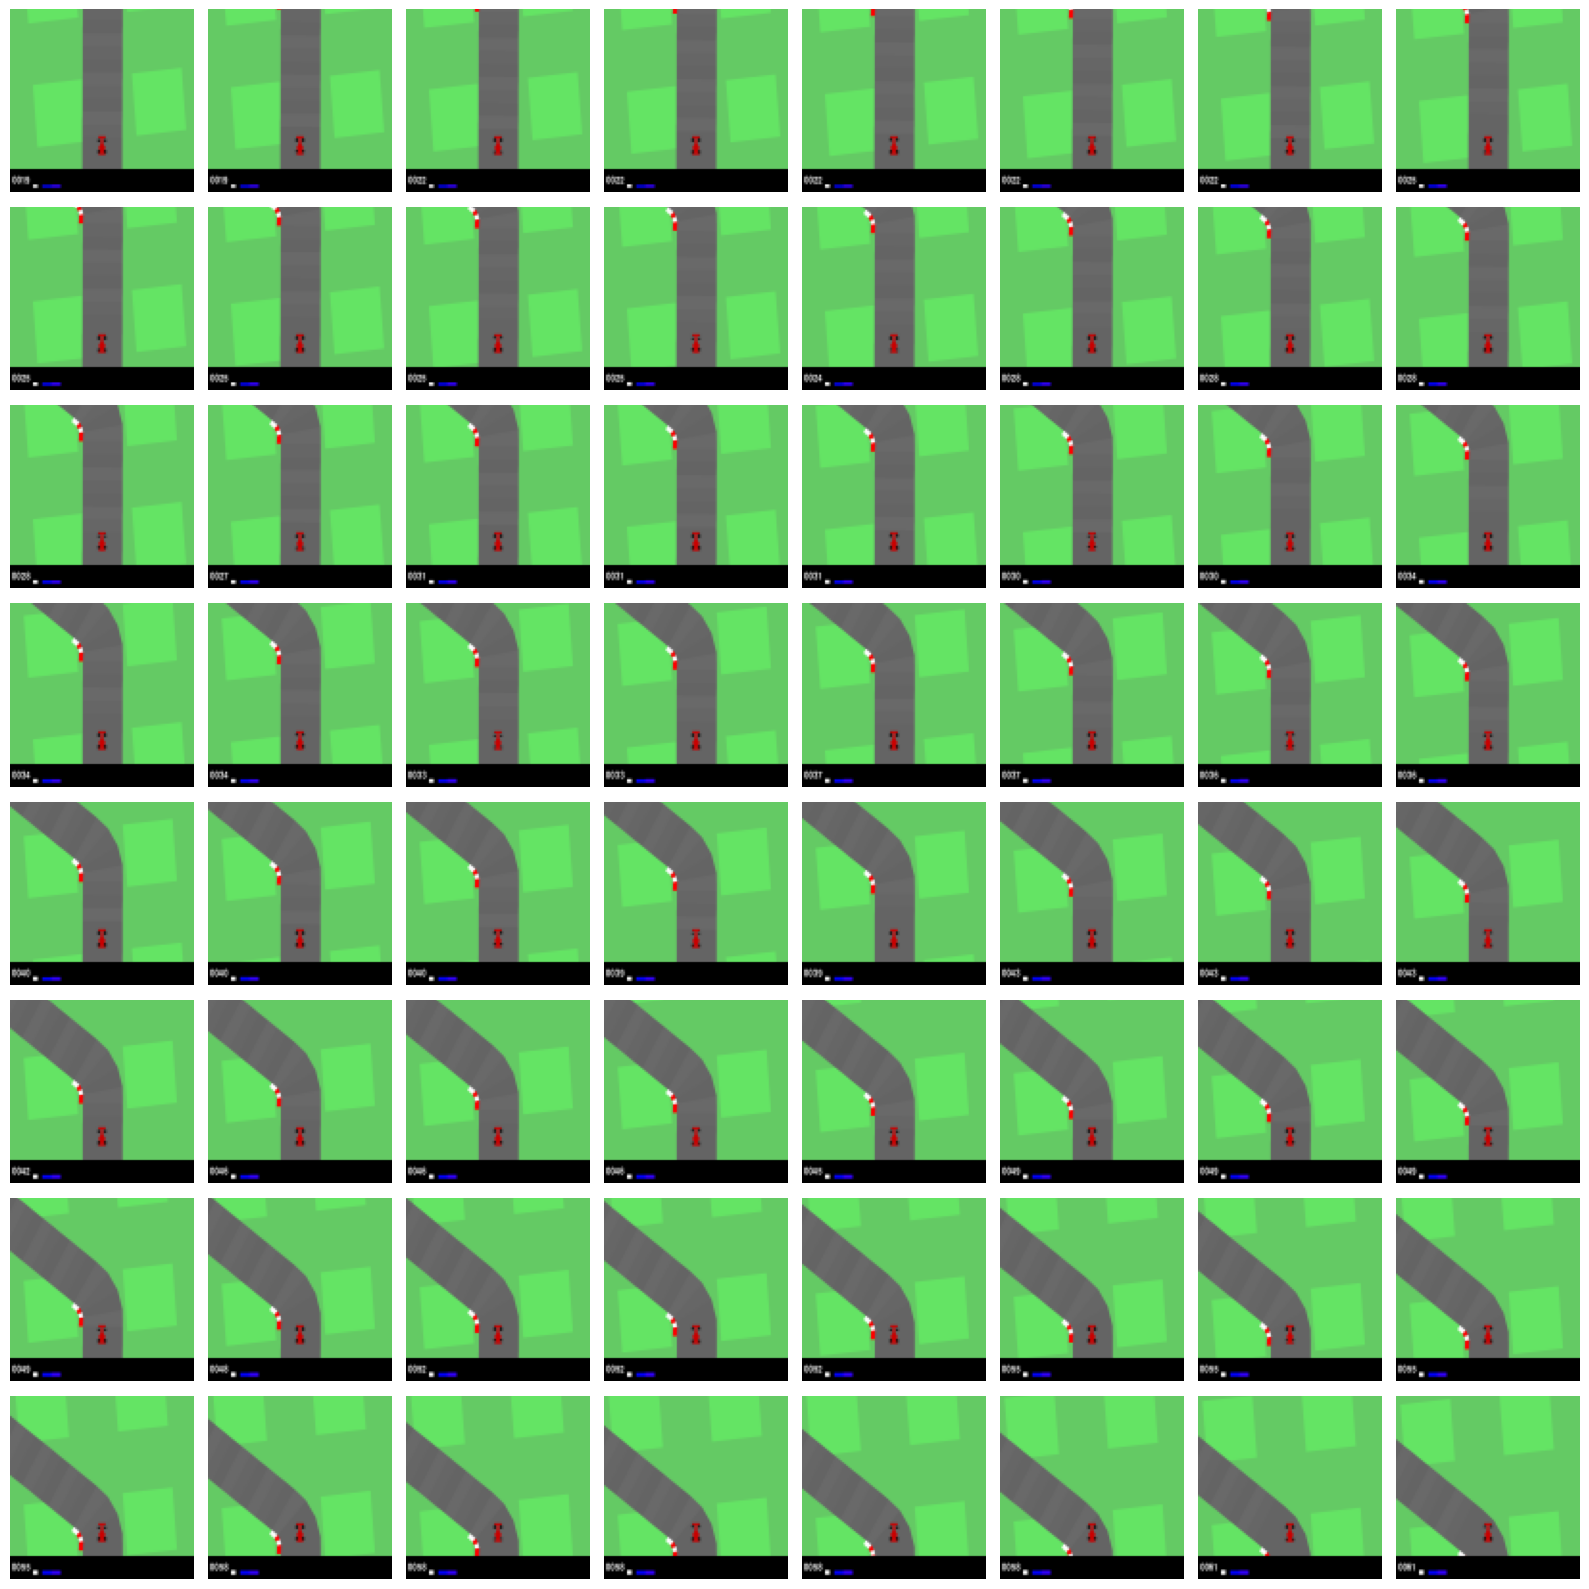

In [8]:
env.reset()
frames = []
for i in range(150):
    observation, reward, terminated, truncated, info = env.step(3)  
    frames.append(observation)

view_observations(frames[50:50+8**2], fig_size=2)

The reward is awarded as follows:<br>
"The reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles visited in the track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points." [see documentation](https://gymnasium.farama.org/environments/box2d/car_racing/#rewards). <br>
The following are rewards every 10 steps if the car just drives forward:

In [9]:
observation, info = env.reset()
cumulative_reward = 0
frames = []
for i in range(100):
    observation, reward, terminated, truncated, info = env.step(3)
    cumulative_reward += reward
    if i % 10 == 0:
        print(f"Step {i}: Current Reward = {reward:.2f}, Cumulative Reward = {cumulative_reward:.2f}")
    frames.append(observation)

Step 0: Current Reward = 6.61, Cumulative Reward = 6.61
Step 10: Current Reward = -0.10, Cumulative Reward = 5.61
Step 20: Current Reward = -0.10, Cumulative Reward = 7.97
Step 30: Current Reward = -0.10, Cumulative Reward = 10.32
Step 40: Current Reward = -0.10, Cumulative Reward = 16.03
Step 50: Current Reward = -0.10, Cumulative Reward = 18.39
Step 60: Current Reward = -0.10, Cumulative Reward = 24.10
Step 70: Current Reward = -0.10, Cumulative Reward = 29.81
Step 80: Current Reward = -0.10, Cumulative Reward = 35.52
Step 90: Current Reward = -0.10, Cumulative Reward = 41.24
